In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
df = pd.read_csv('Google_train_data.csv')

In [3]:
df

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [5]:
df.shape

(1258, 6)

In [7]:
df['Close']= pd.to_numeric(df.Close, errors = 'coerce')
df= df.dropna()
trainData = df.iloc[:,4:5].values

C:\Users\DELL\AppData\Local\Temp\ipykernel_676\3831753846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close']= pd.to_numeric(df.Close, errors = 'coerce')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [9]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [11]:
x_train =  []
y_train = []

for i in range (60,1149):   #60: timestep // 1149: length of data
    x_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))  #adding the batch_size axis
x_train.shape

(1089, 60, 1)

In [14]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100 , return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units= 1))
model.compile(optimizer = 'adam', loss ="mean_squared_error")

In [15]:
hist = model.fit(x_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 11s - loss: 0.0436 - 11s/epoch - 324ms/step
Epoch 2/20
35/35 - 6s - loss: 0.0104 - 6s/epoch - 160ms/step
Epoch 3/20
35/35 - 6s - loss: 0.0099 - 6s/epoch - 162ms/step
Epoch 4/20
35/35 - 6s - loss: 0.0088 - 6s/epoch - 166ms/step
Epoch 5/20
35/35 - 6s - loss: 0.0075 - 6s/epoch - 166ms/step
Epoch 6/20
35/35 - 6s - loss: 0.0078 - 6s/epoch - 169ms/step
Epoch 7/20
35/35 - 6s - loss: 0.0069 - 6s/epoch - 160ms/step
Epoch 8/20
35/35 - 6s - loss: 0.0067 - 6s/epoch - 180ms/step
Epoch 9/20
35/35 - 6s - loss: 0.0069 - 6s/epoch - 180ms/step
Epoch 10/20
35/35 - 6s - loss: 0.0064 - 6s/epoch - 183ms/step
Epoch 11/20
35/35 - 6s - loss: 0.0060 - 6s/epoch - 179ms/step
Epoch 12/20
35/35 - 6s - loss: 0.0057 - 6s/epoch - 184ms/step
Epoch 13/20
35/35 - 6s - loss: 0.0063 - 6s/epoch - 180ms/step
Epoch 14/20
35/35 - 6s - loss: 0.0055 - 6s/epoch - 184ms/step
Epoch 15/20
35/35 - 6s - loss: 0.0054 - 6s/epoch - 177ms/step
Epoch 16/20
35/35 - 7s - loss: 0.0054 - 7s/epoch - 187ms/step
Epoch 17/20
35/

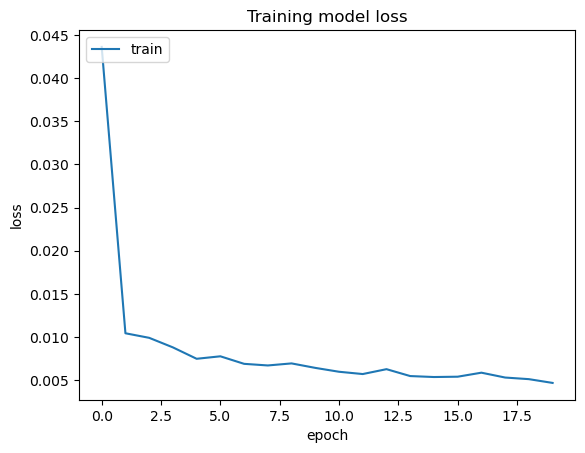

In [16]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc= 'upper left')
plt.show()

In [17]:
testData = pd.read_csv('Google_test_data.csv')

In [18]:
testData

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-13,1236.979980,1249.272949,1233.640991,1235.010010,1235.010010,997300
1,2018-08-14,1235.189941,1245.869995,1225.109985,1242.099976,1242.099976,1348100
2,2018-08-15,1229.260010,1235.239990,1209.510010,1214.380005,1214.380005,1828800
3,2018-08-16,1224.729980,1226.000000,1202.550049,1206.489990,1206.489990,1343200
4,2018-08-17,1202.030029,1209.020020,1188.239990,1200.959961,1200.959961,1389600
...,...,...,...,...,...,...,...
247,2019-08-07,1156.000000,1178.444946,1149.624023,1173.989990,1173.989990,1444300
248,2019-08-08,1182.829956,1205.010010,1173.020020,1204.800049,1204.800049,1468000
249,2019-08-09,1197.989990,1203.880005,1183.603027,1188.010010,1188.010010,1065700
250,2019-08-12,1179.209961,1184.959961,1167.671997,1174.709961,1174.709961,1003000


In [19]:
testData['Close'] = pd.to_numeric(testData.Close, errors= 'coerce')
testData= testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values

In [20]:
#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
x_test = []
length = len(testData)
timestep = 60

for i in range(timestep, length):
    x_test.append(inputClosing_scaled[i-timestep:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(192, 60, 1)

In [21]:
y_predict = model.predict(x_test)
y_predict

6/6 [==============================] - 1s 48ms/step


array([[1.1336384],
       [1.1373563],
       [1.1493131],
       [1.1673651],
       [1.1831608],
       [1.1863046],
       [1.175811 ],
       [1.158503 ],
       [1.1454015],
       [1.1399252],
       [1.1322117],
       [1.1206493],
       [1.1098905],
       [1.1000016],
       [1.0968854],
       [1.1006011],
       [1.1176103],
       [1.1458129],
       [1.1794394],
       [1.2138247],
       [1.2311406],
       [1.2314781],
       [1.2132893],
       [1.1837999],
       [1.1545688],
       [1.1350236],
       [1.1270216],
       [1.124013 ],
       [1.1166172],
       [1.1061333],
       [1.0945452],
       [1.0814831],
       [1.0623487],
       [1.0383847],
       [1.0271395],
       [1.03477  ],
       [1.0560571],
       [1.0824239],
       [1.1088085],
       [1.1248901],
       [1.1396025],
       [1.1557109],
       [1.1735133],
       [1.1900419],
       [1.2014585],
       [1.2034228],
       [1.193843 ],
       [1.1832788],
       [1.1779435],
       [1.1805935],


In [22]:
predicted_price = sc.inverse_transform(y_predict)

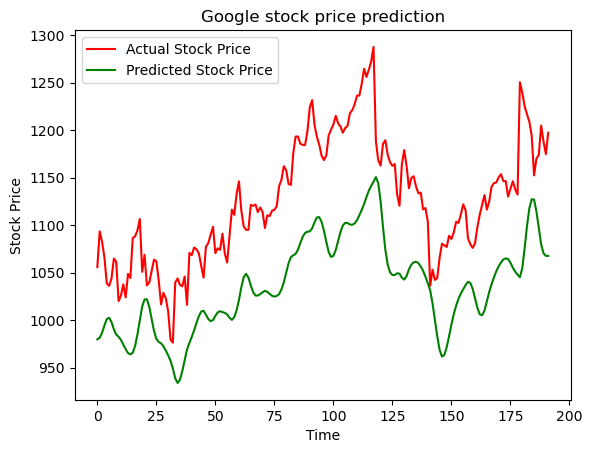

In [23]:
plt.plot(y_test, color = 'red', label= 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()